In [1]:
%matplotlib inline

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, DateFormatter
import matplotlib.finance as mpf
import decimal
import datetime
import ipy_table as ipt
from data_handler import data_handler

In [2]:
tickers = ['WMT', 'XOM']
start_date = '2012-12-31'
end_date = '2013-12-31'
raw_data = data_handler.main(tickers, start_date, end_date, freq='weekly')
data = {}
dates = []
first = True
for ticker in raw_data.keys():
    data[ticker] = []
    for row in sorted(raw_data[ticker], key=lambda x: datetime.datetime.strptime(x['Date'], '%Y-%m-%d')):
        if first:
            dates.append(datetime.datetime.strptime(row['Date'], '%Y-%m-%d').date())
        data[ticker].append(float(row['Adj_Close']))
    first = False

Found in cache!!!
Found in cache!!!


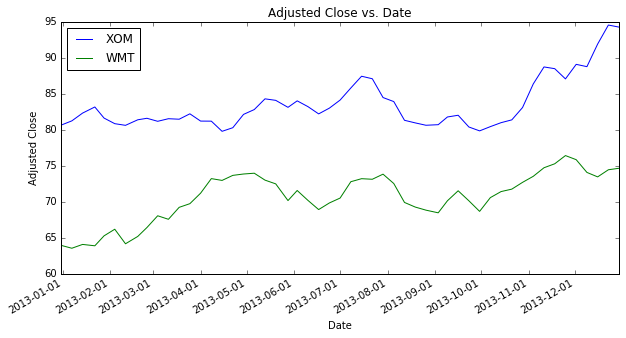

In [3]:
colors = ['b', 'g', 'r', 'y']
cnt = 0
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
handles = []
for ticker, points in data.items():
    temp, = ax.plot(dates, points, color=colors[cnt%len(colors)], label=ticker)
    handles.append(temp)
    cnt += 1

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.set_title('Adjusted Close vs. Date')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted Close')
try:
    ax.legend(handles=handles, loc='best')
except:
    ax.legend(handles=handles, loc='right')
fig.autofmt_xdate()

plt.show()

In [4]:
# Compute the returns
returns = {}
for ticker, points in data.items():
    returns[ticker] = np.array([points[i]/points[i-1] for i in range(1, len(points))])

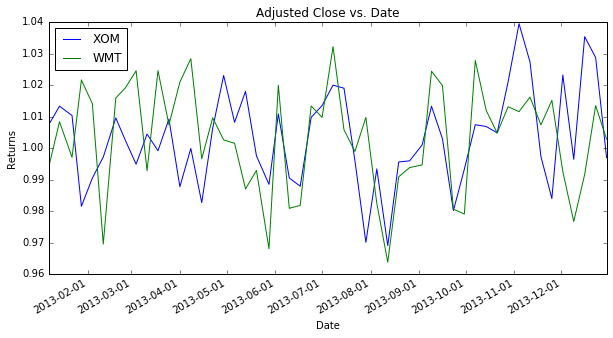

In [5]:

colors = ['b', 'g', 'r', 'y']
cnt = 0
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
handles = []

for ticker, points in returns.items():
    # dates[1:] since return is unknown on dates[0]
    temp, = ax.plot(dates[1:], points, color=colors[cnt%len(colors)], label=ticker)
    handles.append(temp)
    cnt += 1

ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.set_title('Adjusted Close vs. Date')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
try:
    ax.legend(handles=handles, loc='best')
except:
    ax.legend(handles=handles, loc='right')
fig.autofmt_xdate()

# It's pretty ugly
plt.show()

In [6]:
# Let's create some portfolios
portfolios = [
    {'WMT': 1.0},
    {'WMT': 0.75, 'XOM': 0.25},
    {'WMT': 0.5, 'XOM': 0.5},
    {'WMT': 0.25, 'XOM': 0.75},
    {'WMT': 0.0, 'XOM': 1.0}
]

# Convert portfolios into nice strings for legends and such
def portfolio_to_str(port):
    lab = []
    for ticker, allocation in port.items():
        lab.append(str(allocation)+'*%s'%ticker)
    return " + ".join(lab)

print portfolio_to_str(portfolios[1])

0.25*XOM + 0.75*WMT


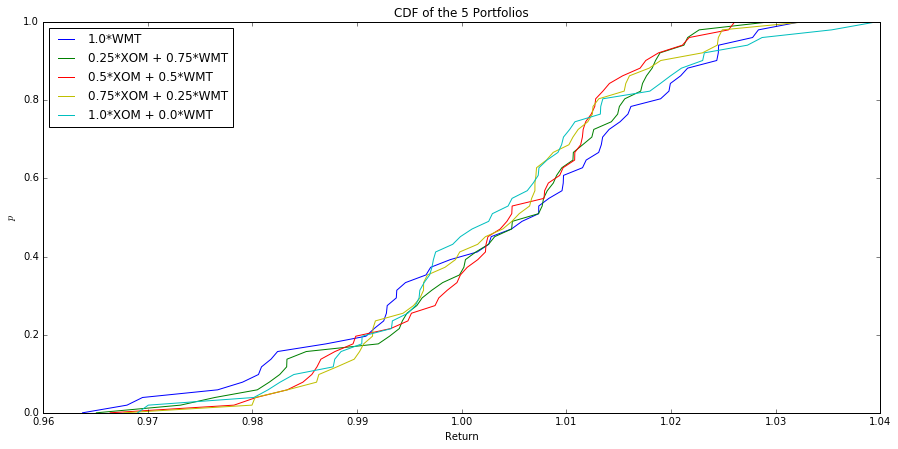

In [7]:
portfolio_returns = []

for allocation in portfolios:
    current_returns = np.zeros(len(dates)-1)
    for ticker, percent in allocation.items():
        current_returns += percent*returns[ticker]
    portfolio_returns.append(current_returns)

colors = ['b', 'g', 'r', 'y', 'c', 'k']
handles = []
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)
       
for i in range(len(portfolios)):
    # Plot the CDF of returns
    rets = np.sort(portfolio_returns[i])
    p = np.linspace(0.0, 1.0, rets.size)
    temp, = ax.plot(rets, p, color=colors[i%len(colors)], label=portfolio_to_str(portfolios[i]))
    handles.append(temp)

ax.set_title('CDF of the %d Portfolios'%len(portfolios))
ax.set_xlabel('Return')
ax.set_ylabel('$p$')
try:
    ax.legend(handles=handles, loc='best')
except:
    ax.legend(handles=handles, loc='right')

plt.show()

In [8]:
# Compute Arithmetic Mean
header = [["Portfolio", "Arithmetic Mean"]]
results = []

for i in range(len(portfolios)):
    # Find mean of portfolio i
    mean = np.mean(portfolio_returns[i])        
    results.append([portfolio_to_str(portfolios[i]), mean])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Arithmetic Mean
1.0*WMT,1.0031204
0.25*XOM + 0.75*WMT,1.0031191
0.5*XOM + 0.5*WMT,1.0031178
0.75*XOM + 0.25*WMT,1.0031165
1.0*XOM + 0.0*WMT,1.0031152


In [9]:
# Compute Geometric Mean
header = [["Portfolio", "Geometric Mean"]]
results = []

for i in range(len(portfolios)):
    # Find geometric mean of portfolio i
    gmean = scipy.stats.mstats.gmean(portfolio_returns[i])       
    results.append([portfolio_to_str(portfolios[i]), gmean])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Geometric Mean
1.0*WMT,1.0029809
0.25*XOM + 0.75*WMT,1.0030189
0.5*XOM + 0.5*WMT,1.0030352
0.75*XOM + 0.25*WMT,1.0030297
1.0*XOM + 0.0*WMT,1.0030023


In [10]:
# Compute Median
header = [["Portfolio", "Median"]]

results = []

for i in range(len(portfolios)):
    # Find median of portfolio i
    median = np.median(portfolio_returns[i])
    results.append([portfolio_to_str(portfolios[i]), median])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Median
1.0*WMT,1.0065623
0.25*XOM + 0.75*WMT,1.0060922
0.5*XOM + 0.5*WMT,1.0045546
0.75*XOM + 0.25*WMT,1.0051476
1.0*XOM + 0.0*WMT,1.0027564


In [11]:
# Compute std dev
header = [["Portfolio", "Standard Deviation"]]
results = []

for i in range(len(portfolios)):
    # computed using 1/(N-ddof) -> we want ddof = 1 for a sample
    stddev = np.std(portfolio_returns[i], ddof=1)
    results.append([portfolio_to_str(portfolios[i]), stddev])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmin([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightblue')
table.render()

Portfolio,Standard Deviation
1.0*WMT,0.0168519
0.25*XOM + 0.75*WMT,0.0142742
0.5*XOM + 0.5*WMT,0.0129695
0.75*XOM + 0.25*WMT,0.0133176
1.0*XOM + 0.0*WMT,0.0152052


In [12]:
# Compute Percentiles
results = []
percentiles = [1, 5, 10, 25, 75]
header = [["Portfolio"] + ["%d%%"%i for i in percentiles]]

for i in range(len(portfolios)):
    percents = scipy.stats.scoreatpercentile(portfolio_returns[i], per=percentiles, interpolation_method ='lower')
    results.append([portfolio_to_str(portfolios[i])] + list(percents))

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
for col in range(1, len(percentiles)+1):
    max_ret = np.argmax([i[col] for i in results])
    table.set_cell_style(max_ret+1, col, color='lightgreen')
table.render()

Portfolio,1%,5%,10%,25%,75%
1.0*WMT,0.9637591,0.9694956,0.9805757,0.9925441,1.0151374
0.25*XOM + 0.75*WMT,0.9650766,0.9764108,0.9826095,0.9943277,1.0143027
0.5*XOM + 0.5*WMT,0.9663942,0.9803549,0.9856739,0.9948603,1.0118490
0.75*XOM + 0.25*WMT,0.9677117,0.9802445,0.9863444,0.9917532,1.0120508
1.0*XOM + 0.0*WMT,0.9690292,0.9801341,0.9839584,0.9933736,1.0108238


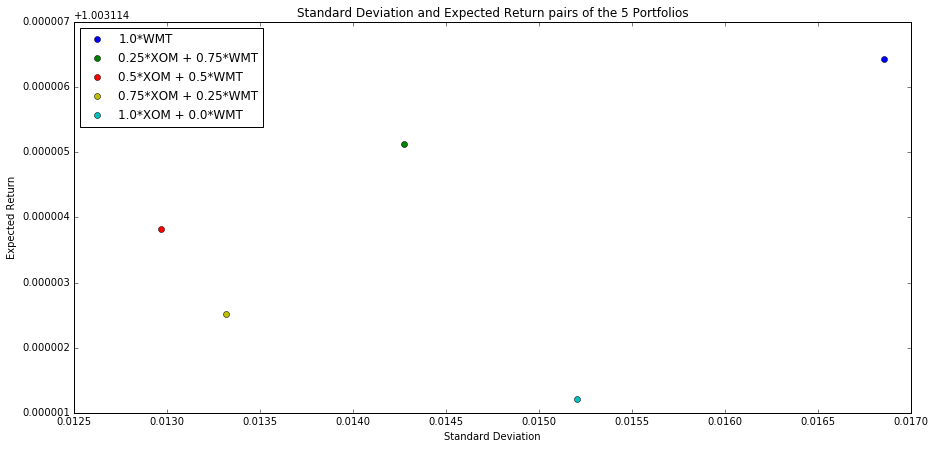

In [13]:
colors = ['b', 'g', 'r', 'y', 'c', 'k']
handles = []
cnt = 0    
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(1, 1, 1)

for i in range(len(portfolios)):
    # Compute the stddev and expected returns and plot
    temp, = ax.plot([np.std(portfolio_returns[i], ddof=1)], [np.mean(portfolio_returns[i])], \
        colors[i%len(colors)]+'o', label=portfolio_to_str(portfolios[i]))
    handles.append(temp)

ax.set_title('Standard Deviation and Expected Return pairs of the %d Portfolios'%len(portfolios))
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Expected Return')

try:
    ax.legend(handles=handles, loc='best', numpoints=1)
except:
    ax.legend(handles=handles, loc='right', numpoints=1)

plt.show()    

In [14]:
# Downside Standard Deviation
results = []
header = [["Portfolio", "Downside Variance", "Downside Deviation"]]

for i in range(len(portfolios)):
    expected_return = np.mean(portfolio_returns[i])
    downside_var = np.mean(np.square(np.maximum(expected_return-portfolio_returns[i], 0.0)))
    results.append([portfolio_to_str(portfolios[i]), downside_var, np.sqrt(downside_var)])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmin([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightblue')
table.render()

Portfolio,Downside Variance,Downside Deviation
1.0*WMT,0.0001595,0.0126279
0.25*XOM + 0.75*WMT,0.0001195,0.0109307
0.5*XOM + 0.5*WMT,0.0000964,0.0098176
0.75*XOM + 0.25*WMT,0.0000917,0.0095759
1.0*XOM + 0.0*WMT,0.0001091,0.0104474


In [15]:
# MAD - Mean Absolute Deviation
results = []
header = [["Portfolio", "MAD"]]

for i in range(len(portfolios)):
    expected_return = np.mean(portfolio_returns[i])
    mad = np.mean(np.abs(expected_return-portfolio_returns[i]))
    results.append([portfolio_to_str(portfolios[i]), mad])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmin([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightblue')
table.render()

Portfolio,MAD
1.0*WMT,0.0139599
0.25*XOM + 0.75*WMT,0.0115752
0.5*XOM + 0.5*WMT,0.0103919
0.75*XOM + 0.25*WMT,0.0108068
1.0*XOM + 0.0*WMT,0.0119995


In [16]:
# Compute beta
results = []
header = [["Portfolio", "beta"]]

# First we need to fetch S&P 500 or other benchmark
raw_data = data_handler.main(['^GSPC'], start_date, end_date, freq='weekly')

data['^GSPC'] = []
for row in sorted(raw_data['^GSPC'], key=lambda x: datetime.datetime.strptime(x['Date'], '%Y-%m-%d')):
    data['^GSPC'].append(float(row['Adj_Close']))
    
S_P_returns = np.array([data['^GSPC'][i]/data['^GSPC'][i-1] for i in range(1, len(data['^GSPC']))])



for i in range(len(portfolios)):
    m = np.cov(portfolio_returns[i], S_P_returns)
    beta = m[0, 1]/m[1, 1]
    results.append([portfolio_to_str(portfolios[i]), beta])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmin([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightblue')
table.render()

Found in cache!!!


Portfolio,beta
1.0*WMT,0.7449837
0.25*XOM + 0.75*WMT,0.7306297
0.5*XOM + 0.5*WMT,0.7162756
0.75*XOM + 0.25*WMT,0.7019216
1.0*XOM + 0.0*WMT,0.6875676


In [17]:
# Sharpe Ratio
risk_free = 1 # Risk Free rate of return

results = []
header = [["Portfolio", "Sharpe Ratio"]]

for i in range(len(portfolios)):
    sharpe = (np.mean(portfolio_returns[i])-risk_free)/np.std(portfolio_returns[i], ddof=1)
    results.append([portfolio_to_str(portfolios[i]), sharpe])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Sharpe Ratio
1.0*WMT,0.1851676
0.25*XOM + 0.75*WMT,0.2185155
0.5*XOM + 0.5*WMT,0.2403961
0.75*XOM + 0.25*WMT,0.2340154
1.0*XOM + 0.0*WMT,0.2048774


In [18]:
# Sortino Ratio

# Use the risk free rate from above

results = []
header = [["Portfolio", "Sortino Ratio"]]

for i in range(len(portfolios)):
    expected_return = np.mean(portfolio_returns[i])
    downside_var = np.mean(np.square(np.maximum(expected_return-portfolio_returns[i], 0.0)))
    sortino = (expected_return - risk_free)/np.sqrt(downside_var)
    results.append([portfolio_to_str(portfolios[i]), sortino])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Sortino Ratio
1.0*WMT,0.2471068
0.25*XOM + 0.75*WMT,0.2853548
0.5*XOM + 0.5*WMT,0.3175739
0.75*XOM + 0.25*WMT,0.3254527
1.0*XOM + 0.0*WMT,0.2981799


In [19]:
# Treynor Ratio

# Use the risk free rate from above

results = []
header = [["Portfolio", "Treynor Ratio"]]

for i in range(len(portfolios)):
    expected_return = np.mean(portfolio_returns[i])
    m = np.cov(portfolio_returns[i], S_P_returns)
    beta = m[0, 1]/m[1, 1]
    treynor = (expected_return - risk_free)/beta
    results.append([portfolio_to_str(portfolios[i]), treynor])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Treynor Ratio
1.0*WMT,0.0041886
0.25*XOM + 0.75*WMT,0.0042691
0.5*XOM + 0.5*WMT,0.0043528
0.75*XOM + 0.25*WMT,0.0044400
1.0*XOM + 0.0*WMT,0.0045308


In [20]:
# Information Ratio

# Use the risk free rate from above

results = []
header = [["Portfolio", "Information Ratio"]]

for i in range(len(portfolios)):
    info_ratio = (np.mean(portfolio_returns[i])-np.mean(S_P_returns))/np.std(portfolio_returns[i]-S_P_returns, ddof=1)
    results.append([portfolio_to_str(portfolios[i]), info_ratio])

# Make a table to display the results
table = ipt.IpyTable(header+results)
table.apply_theme('basic')
table.set_global_style(float_format='%0.7f')
max_ret = np.argmax([i[1] for i in results])
table.set_row_style(max_ret+1, color='lightgreen')
table.render()

Portfolio,Information Ratio
1.0*WMT,-0.0990670
0.25*XOM + 0.75*WMT,-0.1247853
0.5*XOM + 0.5*WMT,-0.1431487
0.75*XOM + 0.25*WMT,-0.1342182
1.0*XOM + 0.0*WMT,-0.1089604


In [21]:
# TODO: TCE